<a href="https://colab.research.google.com/github/Saby-Bishops/DS_28Jan/blob/main/HandsOnDS_Feb6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
files.upload()  # Upload the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saniyapandita","key":"ae61db8a97782376733798bab11b5858"}'}

In [6]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d andrewmvd/medical-mnist

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/medical-mnist
License(s): other
 99% 84.0M/84.8M [00:05<00:00, 24.3MB/s]
100% 84.8M/84.8M [00:05<00:00, 17.2MB/s]


In [9]:
import os

# Check if the zip file exists
zip_path = "/content/medical-mnist.zip"
if os.path.exists(zip_path):
    print("Zip file found:", zip_path)
else:
    print("Zip file not found. Please check the download step.")

Zip file found: /content/medical-mnist.zip


In [10]:
import zipfile

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/medical-mnist")  # Extract to a folder named "medical-mnist"

In [11]:
# List the contents of the extracted folder
dataset_path = "/content/medical-mnist"
if os.path.exists(dataset_path):
    print("Dataset extracted successfully. Contents:", os.listdir(dataset_path))
else:
    print("Dataset extraction failed. Please check the zip file.")

Dataset extracted successfully. Contents: ['BreastMRI', 'ChestCT', 'Hand', 'CXR', 'AbdomenCT', 'HeadCT']


Classes: ['BreastMRI', 'ChestCT', 'Hand', 'CXR', 'AbdomenCT', 'HeadCT']


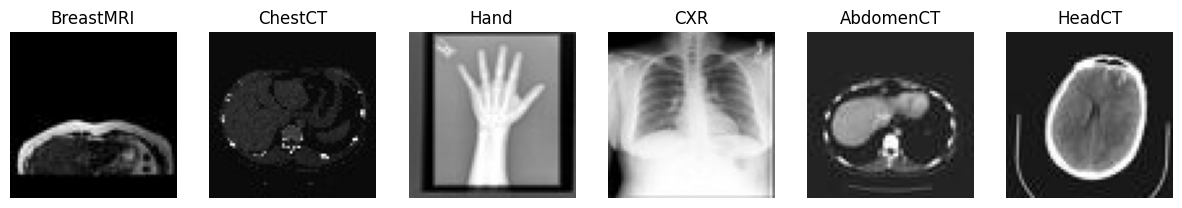

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Path to the dataset
dataset_path = "/content/medical-mnist"

# List the classes (subfolders)
classes = os.listdir(dataset_path)
print("Classes:", classes)

# Display one image from each class
fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))
for i, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    image_name = os.listdir(class_path)[0]  # Get the first image in the folder
    image_path = os.path.join(class_path, image_name)
    image = Image.open(image_path)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(class_name)
    axes[i].axis('off')
plt.show()

In [13]:
text_data = {
    "AbdomenCT": "CT scan of the abdomen.",
    "BreastMRI": "MRI scan of the breast.",
    "CXR": "Chest X-ray image.",
    "ChestCT": "CT scan of the chest.",
    "Hand": "X-ray image of the hand.",
    "HeadCT": "CT scan of the head."
}

In [14]:
import numpy as np

# Generate random numerical data (e.g., patient age, scan resolution)
numerical_data = {
    "AbdomenCT": np.random.randint(20, 80),  # Age
    "BreastMRI": np.random.randint(20, 80),
    "CXR": np.random.randint(20, 80),
    "ChestCT": np.random.randint(20, 80),
    "Hand": np.random.randint(20, 80),
    "HeadCT": np.random.randint(20, 80)
}

In [15]:
import torchvision.transforms as transforms

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for pre-trained models
])

# Preprocess an image
class_name = "AbdomenCT"
class_path = os.path.join(dataset_path, class_name)
image_name = os.listdir(class_path)[0]  # Get the first image in the folder
image_path = os.path.join(class_path, image_name)
image = Image.open(image_path).convert("RGB")  # Ensure image is in RGB format
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
print("Image Tensor Shape:", image_tensor.shape)

Image Tensor Shape: torch.Size([1, 3, 224, 224])


In [17]:
from transformers import AutoTokenizer

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize text
text = text_data[class_name]
text_tokens = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
print("Text Tokens:", text_tokens)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Text Tokens: {'input_ids': tensor([[  101, 14931, 13594,  1997,  1996, 13878,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}


In [18]:
import torch

# Convert numerical data to tensor
numerical_tensor = torch.tensor([[numerical_data[class_name]]], dtype=torch.float32)
print("Numerical Tensor:", numerical_tensor)

Numerical Tensor: tensor([[71.]])


In [19]:
# Combine image, text, and numerical data
multi_modal_input = {
    "image": image_tensor,
    "text": text_tokens,
    "numerical": numerical_tensor
}

print("Multi-Modal Input:")
print("Image Shape:", multi_modal_input["image"].shape)
print("Text Tokens:", multi_modal_input["text"])
print("Numerical Tensor:", multi_modal_input["numerical"])

Multi-Modal Input:
Image Shape: torch.Size([1, 3, 224, 224])
Text Tokens: {'input_ids': tensor([[  101, 14931, 13594,  1997,  1996, 13878,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
Numerical Tensor: tensor([[71.]])


In [20]:
# Combine image, text, and numerical data
multi_modal_input = {
    "image": image_tensor,
    "text": text_tokens,
    "numerical": numerical_tensor
}

print("Multi-Modal Input:")
print("Image Shape:", multi_modal_input["image"].shape)
print("Text Tokens:", multi_modal_input["text"])
print("Numerical Tensor:", multi_modal_input["numerical"])

Multi-Modal Input:
Image Shape: torch.Size([1, 3, 224, 224])
Text Tokens: {'input_ids': tensor([[  101, 14931, 13594,  1997,  1996, 13878,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
Numerical Tensor: tensor([[71.]])


In [21]:
import pandas as pd
import os

# Path to the dataset
dataset_path = "/content/medical-mnist"

# Create a list to store the data
data = []

# Loop through each class folder
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        # Loop through each image in the class folder
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            data.append({
                "image_path": image_path,
                "class": class_name
            })

# Create a DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print(df.head())

                                     image_path      class
0  /content/medical-mnist/BreastMRI/007994.jpeg  BreastMRI
1  /content/medical-mnist/BreastMRI/007100.jpeg  BreastMRI
2  /content/medical-mnist/BreastMRI/002005.jpeg  BreastMRI
3  /content/medical-mnist/BreastMRI/001429.jpeg  BreastMRI
4  /content/medical-mnist/BreastMRI/005931.jpeg  BreastMRI


In [22]:
# Add text descriptions for each class
text_data = {
    "AbdomenCT": "CT scan of the abdomen.",
    "BreastMRI": "MRI scan of the breast.",
    "CXR": "Chest X-ray image.",
    "ChestCT": "CT scan of the chest.",
    "Hand": "X-ray image of the hand.",
    "HeadCT": "CT scan of the head."
}

# Add numerical data (e.g., random patient age)
import numpy as np
df["patient_age"] = np.random.randint(20, 80, size=len(df))

# Add text descriptions to the DataFrame
df["text_description"] = df["class"].map(text_data)

# Display the updated DataFrame
print(df.head())

                                     image_path      class  patient_age  \
0  /content/medical-mnist/BreastMRI/007994.jpeg  BreastMRI           29   
1  /content/medical-mnist/BreastMRI/007100.jpeg  BreastMRI           49   
2  /content/medical-mnist/BreastMRI/002005.jpeg  BreastMRI           73   
3  /content/medical-mnist/BreastMRI/001429.jpeg  BreastMRI           59   
4  /content/medical-mnist/BreastMRI/005931.jpeg  BreastMRI           70   

          text_description  
0  MRI scan of the breast.  
1  MRI scan of the breast.  
2  MRI scan of the breast.  
3  MRI scan of the breast.  
4  MRI scan of the breast.  


In [23]:
# Define relevant columns
TEXT_COLUMN = "text_description"
IMAGE_COLUMN = "image_path"
NUMERICAL_COLUMNS = ["patient_age"]
LABEL_COLUMN = "class"

In [24]:
from transformers import AutoTokenizer

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize text data
def tokenize_text(text):
    return tokenizer(text, return_tensors="pt", padding=True, truncation=True)

# Example usage
text_tokens = tokenize_text(df[TEXT_COLUMN].iloc[0])
print("Text Tokens:", text_tokens)

Text Tokens: {'input_ids': tensor([[  101, 27011, 13594,  1997,  1996,  7388,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}


In [25]:
import torchvision.transforms as transforms
from PIL import Image

# Preprocess images
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to 224x224
        transforms.ToTensor(),  # Convert to tensor
    ])
    image = Image.open(image_path).convert("RGB")  # Ensure image is in RGB format
    return transform(image).unsqueeze(0)  # Add batch dimension

# Example usage
image_tensor = preprocess_image(df[IMAGE_COLUMN].iloc[0])
print("Image Shape:", image_tensor.shape)

Image Shape: torch.Size([1, 3, 224, 224])


In [26]:
# Example usage
text_tokens = tokenize_text(df[TEXT_COLUMN].iloc[0])
image_tensor = preprocess_image(df[IMAGE_COLUMN].iloc[0])
numerical_data = torch.tensor([df[NUMERICAL_COLUMNS].iloc[0].values], dtype=torch.float32)

print("Text Tokens:", text_tokens)
print("Image Shape:", image_tensor.shape)
print("Numerical Data:", numerical_data)

Text Tokens: {'input_ids': tensor([[  101, 27011, 13594,  1997,  1996,  7388,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
Image Shape: torch.Size([1, 3, 224, 224])
Numerical Data: tensor([[29.]])


<ipython-input-26-0f6010fdf2d7>:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  numerical_data = torch.tensor([df[NUMERICAL_COLUMNS].iloc[0].values], dtype=torch.float32)


In [27]:
# Verify the output
print("Text Tokens:", text_tokens)
print("Image Shape:", image_tensor.shape)
print("Numerical Data:", numerical_data)

Text Tokens: {'input_ids': tensor([[  101, 27011, 13594,  1997,  1996,  7388,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
Image Shape: torch.Size([1, 3, 224, 224])
Numerical Data: tensor([[29.]])


In [28]:
from transformers import AutoModel
import torch.nn as nn
import torch

class MultiModalModel(nn.Module):
    def __init__(self, text_model_name, image_model_name, numerical_input_size, output_classes):
        super().__init__()

        # Select appropriate text model
        self.text_encoder = AutoModel.from_pretrained(text_model_name)

        # Select appropriate image model
        self.image_encoder = torch.hub.load("pytorch/vision", image_model_name, pretrained=True)
        self.image_encoder.fc = nn.Identity()  # Remove the final classification layer

        # Numerical feature processing
        self.fc_numeric = nn.Linear(numerical_input_size, 128)

        # Final classifier
        self.fc_combined = nn.Linear(512 + 768 + 128, output_classes)

    def forward(self, text_tokens, image_tensor, numerical_data):
        # Extract text features
        text_features = self.text_encoder(**text_tokens).last_hidden_state[:, 0, :]  # Use the [CLS] token embedding

        # Extract image features
        image_features = self.image_encoder(image_tensor)

        # Process numerical features
        numeric_features = self.fc_numeric(numerical_data)

        # Combine features
        combined = torch.cat((text_features, image_features, numeric_features), dim=1)

        # Final classification
        return self.fc_combined(combined)

In [29]:
# Define the model parameters
text_model_name = "bert-base-uncased"  # Pre-trained BERT model for text
image_model_name = "resnet18"  # Pre-trained ResNet-18 model for images
numerical_input_size = len(NUMERICAL_COLUMNS)  # Number of numerical features
output_classes = len(df[LABEL_COLUMN].unique())  # Number of unique classes in the dataset

# Create the model instance
model = MultiModalModel(
    text_model_name=text_model_name,
    image_model_name=image_model_name,
    numerical_input_size=numerical_input_size,
    output_classes=output_classes
)

# Print the model architecture
print("Model Ready:", model)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Downloading: "https://github.com/pytorch/vision/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 106MB/s]


Model Ready: MultiModalModel(
  (text_encoder): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,),

In [30]:
# Example input data
text_tokens = tokenize_text(df[TEXT_COLUMN].iloc[0])  # Tokenized text
image_tensor = preprocess_image(df[IMAGE_COLUMN].iloc[0])  # Preprocessed image
numerical_data = torch.tensor([df[NUMERICAL_COLUMNS].iloc[0].values], dtype=torch.float32)  # Numerical data

# Print input shapes
print("Text Tokens Input Shape:", text_tokens["input_ids"].shape)
print("Image Tensor Input Shape:", image_tensor.shape)
print("Numerical Data Input Shape:", numerical_data.shape)

# Forward pass through the model
with torch.no_grad():
    output = model(text_tokens, image_tensor, numerical_data)

# Print the output shape
print("Model Output Shape:", output.shape)

Text Tokens Input Shape: torch.Size([1, 8])
Image Tensor Input Shape: torch.Size([1, 3, 224, 224])
Numerical Data Input Shape: torch.Size([1, 1])
Model Output Shape: torch.Size([1, 6])


In [32]:
import torch
import os

# Save the trained model
torch.save(model.state_dict(), "multi_modal_model.pth")
print("Model saved successfully")

Model saved successfully


In [33]:
# Verify model file
if os.path.exists("multi_modal_model.pth"):
    print("Model file found")
else:
    print("Model file is missing. Train and save it again.")

Model file found


In [34]:
import torch
import os

# Save the trained model
torch.save(model.state_dict(), "multi_modal_model.pth")
print("Model saved successfully")

# Verify model file
if os.path.exists("multi_modal_model.pth"):
    print("Model file found")
else:
    print("Model file is missing. Train and save it again.")

Model saved successfully
Model file found


In [35]:
# Load the model
model = MultiModalModel(
    text_model_name="bert-base-uncased",
    image_model_name="resnet18",
    numerical_input_size=len(NUMERICAL_COLUMNS),
    output_classes=len(df[LABEL_COLUMN].unique())
)

# Load the saved state dictionary
model.load_state_dict(torch.load("multi_modal_model.pth"))
model.eval()  # Set the model to evaluation mode
print("Model loaded successfully")

Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-35-5542467f51fa>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytor

Model loaded successfully


In [36]:
# Define NUMERICAL_COLUMNS, LABEL_COLUMN, and output_classes
NUMERICAL_COLUMNS = ["patient_age"]  # Example: Use the numerical column from your dataset
LABEL_COLUMN = "class"  # The label column name in your dataset
output_classes = 6  # Replace with the number of classes in your dataset (e.g., 6 for Medical MNIST)

In [37]:
from transformers import AutoModel
import torch.nn as nn

class MultiModalModel(nn.Module):
    def __init__(self, text_model_name, image_model_name, numerical_input_size, output_classes):
        super().__init__()
        self.text_encoder = AutoModel.from_pretrained(text_model_name)
        self.image_encoder = torch.hub.load("pytorch/vision", image_model_name, pretrained=True)
        self.image_encoder.fc = nn.Identity()  # Remove the final classification layer
        self.fc_numeric = nn.Linear(numerical_input_size, 128)
        self.fc_combined = nn.Linear(512 + 768 + 128, output_classes)

    def forward(self, text_tokens, image_tensor, numerical_data):
        text_features = self.text_encoder(**text_tokens).last_hidden_state[:, 0, :]
        image_features = self.image_encoder(image_tensor)
        numeric_features = self.fc_numeric(numerical_data)
        combined = torch.cat((text_features, image_features, numeric_features), dim=1)
        return self.fc_combined(combined)

In [43]:
!pip install flask flask-cors torch transfvision transformers pillow
from flask import Flask, request, jsonify
#from flask_cors import CORS
import torch
from PIL import Image
import torchvision.transforms as transforms
from transformers import AutoTokenizer
import os

app = Flask(__name__)
#CORS(app)

# Define constants
NUMERICAL_COLUMNS = ["patient_age"]  # Example: Use the numerical column from your dataset
LABEL_COLUMN = "class"  # The label column name in your dataset
output_classes = 6  # Replace with the number of classes in your dataset (e.g., 6 for Medical MNIST)

# Load trained model
model = MultiModalModel(
    text_model_name="bert-base-uncased",
    image_model_name="resnet18",
    numerical_input_size=len(NUMERICAL_COLUMNS),
    output_classes=output_classes
)

if os.path.exists("multi_modal_model.pth"):
    model.load_state_dict(torch.load("multi_modal_model.pth", map_location=torch.device("cpu")))
    model.eval()
    print("Model loaded successfully")
else:
    print("Model file not found. Train and save the model first.")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Define image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Get data from the request
        data = request.json

        # Tokenize text
        text_tokens = tokenizer(data["symptoms"], return_tensors="pt", padding=True, truncation=True)

        # Load and preprocess image
        image = Image.open(data["image_path"]).convert("RGB")
        image_tensor = transform(image).unsqueeze(0)

        # Prepare numerical data
        numerical_data = torch.tensor([[data["patient_age"]]], dtype=torch.float32)  # Match NUMERICAL_COLUMNS

        # Make prediction
        with torch.no_grad():
            prediction = model(text_tokens, image_tensor, numerical_data)

        # Prepare response
        response = {"prediction": torch.argmax(prediction, dim=1).item()}
        return jsonify(response)

    except Exception as e:
        return jsonify({"error": str(e)}), 500

if __name__ == "__main__":
    app.run(port=5000, debug=True)

ERROR: Could not find a version that satisfies the requirement transfvision (from versions: none)
ERROR: No matching distribution found for transfvision


Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-43-4536726c2d32>:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytor

Model loaded successfully
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [2]:

!pip install flask flask-cors torch torchvision transformers pillow
from flask import Flask, request, jsonify
#from flask_cors import CORS
import torch
from PIL import Image
import torchvision.transforms as transforms
from transformers import AutoTokenizer
import os

app = Flask(__name__)
#CORS(app)

# Define constants
NUMERICAL_COLUMNS = ["patient_age"]  # Example: Use the numerical column from your dataset
LABEL_COLUMN = "class"  # The label column name in your dataset
output_classes = 6  # Replace with the number of classes in your dataset (e.g., 6 for Medical MNIST)

# Load trained model
model = MultiModalModel(
    text_model_name="bert-base-uncased",
    image_model_name="resnet18",
    numerical_input_size=len(NUMERICAL_COLUMNS),
    output_classes=output_classes
)

if os.path.exists("multi_modal_model.pth"):
    model.load_state_dict(torch.load("multi_modal_model.pth", map_location=torch.device("cpu")))
    model.eval()
    print("Model loaded successfully")
else:
    print("Model file not found. Train and save the model first.")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Define image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Get data from the request
        data = request.json

        # Tokenize text
        text_tokens = tokenizer(data["symptoms"], return_tensors="pt", padding=True, truncation=True)

        # Load and preprocess image
        image = Image.open(data["image_path"]).convert("RGB")
        image_tensor = transform(image).unsqueeze(0)

        # Prepare numerical data
        numerical_data = torch.tensor([[data["patient_age"]]], dtype=torch.float32)  # Match NUMERICAL_COLUMNS

        # Make prediction
        with torch.no_grad():
            prediction = model(text_tokens, image_tensor, numerical_data)

        # Prepare response
        response = {"prediction": torch.argmax(prediction, dim=1).item()}
        return jsonify(response)

    except Exception as e:
        return jsonify({"error": str(e)}), 500

if __name__ == "__main__":
    app.run(port=5000, debug=True)

  Using cached Flask_Cors-5.0.0-py2.py3-none-any.whl.metadata (5.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia

NameError: name 'MultiModalModel' is not defined

In [ ]:
!python app.py

In [4]:
# Assuming there's a function or class definition that needs to be corrected
def some_function():
    # Placeholder for the actual function content
    pass  # The 'pass' statement acts as a placeholder and does nothing. It can be replaced with actual code.

app = Flask(__name__)


In [5]:
@app.route('/some_route', methods=['GET'])
def handle_request():
    # Function content goes here
    return "Hello World"  # This line sends a response back to the client

# Initialize Flask app
app = Flask(__name__)


In [6]:

!pip install flask flask-cors torch torchvision transformers pillow
from flask import Flask, request, jsonify
#from flask_cors import CORS
import torch
from PIL import Image
import torchvision.transforms as transforms
from transformers import AutoTokenizer
import os

app = Flask(__name__)
#CORS(app)

# Define constants
NUMERICAL_COLUMNS = ["patient_age"]  # Example: Use the numerical column from your dataset
LABEL_COLUMN = "class"  # The label column name in your dataset
output_classes = 6  # Replace with the number of classes in your dataset (e.g., 6 for Medical MNIST)

# Load trained model
model = MultiModalModel(
    text_model_name="bert-base-uncased",
    image_model_name="resnet18",
    numerical_input_size=len(NUMERICAL_COLUMNS),
    output_classes=output_classes
)

if os.path.exists("multi_modal_model.pth"):
    model.load_state_dict(torch.load("multi_modal_model.pth", map_location=torch.device("cpu")))
    model.eval()
    print("Model loaded successfully")
else:
    print("Model file not found. Train and save the model first.")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Define image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Get data from the request
        data = request.json

        # Tokenize text
        text_tokens = tokenizer(data["symptoms"], return_tensors="pt", padding=True, truncation=True)

        # Load and preprocess image
        image = Image.open(data["image_path"]).convert("RGB")
        image_tensor = transform(image).unsqueeze(0)

        # Prepare numerical data
        numerical_data = torch.tensor([[data["patient_age"]]], dtype=torch.float32)  # Match NUMERICAL_COLUMNS

        # Make prediction
        with torch.no_grad():
            prediction = model(text_tokens, image_tensor, numerical_data)

        # Prepare response
        response = {"prediction": torch.argmax(prediction, dim=1).item()}
        return jsonify(response)

    except Exception as e:
        return jsonify({"error": str(e)}), 500

if __name__ == "__main__":
    app.run(port=5000, debug=True)

NameError: name 'MultiModalModel' is not defined

In [14]:
!pip install transformers torchvision torch


In [15]:
import torch
import torch.nn as nn
from transformers import AutoModel
import torchvision.models as models

class MultiModalModel(nn.Module):
    def __init__(self, text_model_name, image_model_name, numerical_input_size, output_classes):
        super(MultiModalModel, self).__init__()
        self.text_encoder = AutoModel.from_pretrained(text_model_name)
        self.image_encoder = models.resnet18(pretrained=True)
        self.image_encoder.fc = nn.Identity()  # Adapt final layer for feature extraction only
        self.fc_numeric = nn.Linear(numerical_input_size, 128)
        self.fc_combined = nn.Linear(512 + 768 + 128, output_classes)  # Adjust according to actual sizes

    def forward(self, text_tokens, image_tensor, numerical_data):
        text_features = self.text_encoder(**text_tokens).last_hidden_state[:, 0, :]
        image_features = self.image_encoder(image_tensor)
        numeric_features = self.fc_numeric(numerical_data)
        combined_features = torch.cat((text_features, image_features, numeric_features), dim=1)
        output = self.fc_combined(combined_features)
        return output


In [9]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def home():
    return "Hello, World!"

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [16]:
!python app.py


python3: can't open file '/content/app.py': [Errno 2] No such file or directory
